# Semental Analysis Using NLP(Natural Language Processing

## Importing libraries


In [1]:
import pandas as pd
import numpy as np
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

## Installing library

In [5]:
pip install vaderSentiment;


Note: you may need to restart the kernel to use updated packages.


# Creating dummy data

In [3]:

data = pd.DataFrame({
    'timestamp': [
        '2024-12-20 10:00:00', '2024-12-20 11:00:00', '2024-12-21 10:30:00',
        '2024-12-21 12:00:00', '2024-12-22 14:00:00', '2024-12-22 15:30:00'
    ],
    'text': [
        "I absolutely love this product! Highly recommend it.",
        "The event was disappointing, expected better organization.",
        "Amazing features, very user-friendly.",
        "Horrible service. Will not buy again.",
        "The product is okay, but nothing exceptional.",
        "Great value for the price. Very satisfied!"
    ]
})


## Preprocessing funciton

In [4]:

# Step 2: Preprocessing Function
def preprocess_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'[^A-Za-z ]+', '', text)
    text = text.lower()
    return text

data['cleaned_text'] = data['text'].apply(preprocess_text)


## sentiment Analysis

In [5]:

analyzer = SentimentIntensityAnalyzer()

def sentiment_score(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']

data['sentiment_score'] = data['cleaned_text'].apply(sentiment_score)

data['sentiment'] = data['sentiment_score'].apply(
    lambda x: 'Positive' if x > 0.05 else 'Negative' if x < -0.05 else 'Neutral'
)

## Time-Based Sentiment Analysis

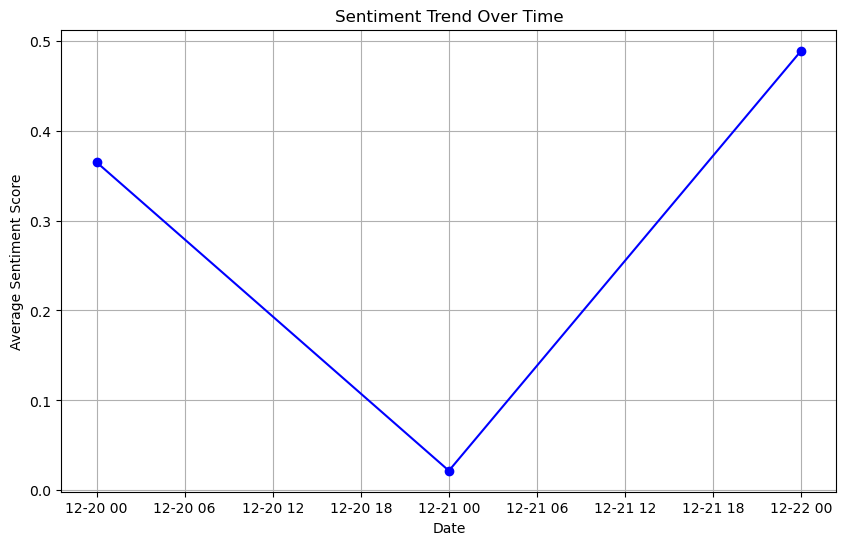

In [6]:

data['date'] = pd.to_datetime(data['timestamp'])
sentiment_trend = data.groupby(data['date'].dt.date)['sentiment_score'].mean()

# Visualization
# Plot sentiment trend over time
plt.figure(figsize=(10, 6))
plt.plot(sentiment_trend.index, sentiment_trend.values, marker='o', color='blue')
plt.title('Sentiment Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.grid()
plt.show()


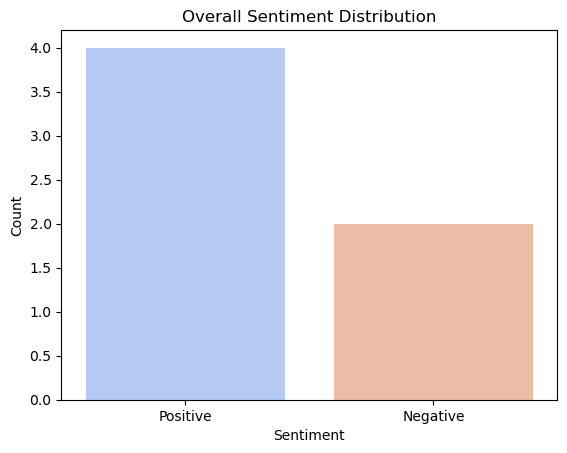

Processed Data:
             timestamp                                               text  \
0  2024-12-20 10:00:00  I absolutely love this product! Highly recomme...   
1  2024-12-20 11:00:00  The event was disappointing, expected better o...   
2  2024-12-21 10:30:00              Amazing features, very user-friendly.   
3  2024-12-21 12:00:00              Horrible service. Will not buy again.   
4  2024-12-22 14:00:00      The product is okay, but nothing exceptional.   
5  2024-12-22 15:30:00         Great value for the price. Very satisfied!   

                                        cleaned_text  sentiment_score  \
0  i absolutely love this product highly recommen...           0.8067   
1  the event was disappointing expected better or...          -0.0772   
2                 amazing features very userfriendly           0.5859   
3                horrible service will not buy again          -0.5423   
4        the product is okay but nothing exceptional           0.1154   
5     

In [7]:
sns.countplot(x='sentiment', data=data, palette='coolwarm')
plt.title('Overall Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Step 6: Display Processed Data
print("Processed Data:")
print(data)
